In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl
import xarray as xr

from boutdata.restart import addvar
import glob
import shutil

import scipy

sys.path.append(r"/ssd_scratch/scripts/sdtools")


from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.neutral_transport import NeutralTransport
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
# from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2

# Intro
- This PR makes sure that processes that depend on collisions get the right ones
- Conduction should only take ee or ii into account
- Diffusion should only take CX and IZ into account
- Neutral viscosity should take CX and IZ 
- Ion viscosity should take ii 

# IO

In [8]:
cs = dict()

db = CaseDB(
    case_dir = r"/ssd_scratch/hcases",
    grid_dir = r"/ssd_scratch/hcases"
    )

toload = [
    # dict(name="base", id="f1d-base", unnormalise_geom = True, use_xhermes = True),
    # dict(name="fix", id="f1d2-fix_factors", unnormalise_geom = True, use_xhermes = True), 
    dict(name="testbase", id="f1d3-base_1drectest", unnormalise_geom = True, use_xhermes = True), 
    dict(name="testfix", id="f1d3b-fix_1drectest", unnormalise_geom = True, use_xhermes = True), 
]

for case in toload:
    cs[case["name"]] = Load.case_1D(db.casepaths[case["id"]])


Unnormalising with xHermes
Unnormalising with xHermes


# Profiles

## Convergence

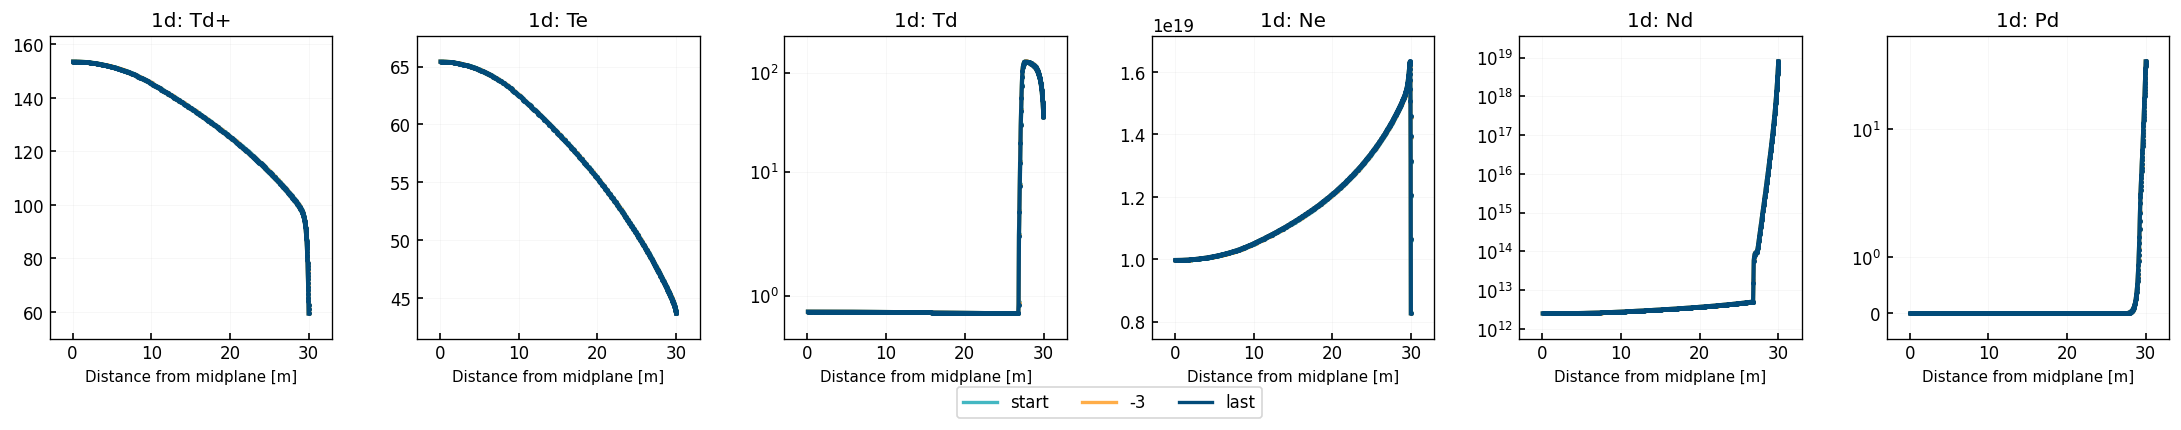

In [3]:
case = "fix"
lineplot(
    {
        "start":cs[case].ds.isel(t=-5),
        "-3":cs[case].ds.isel(t=-3),
        "last":cs[case].ds.isel(t=-1),

    },
    clean_guards = True,
    params = ["Td+", "Te", "Td", "Ne", "Nd", "Pd"],
    regions = ["1d"],
    # xlims=(8,10.3)
)

Text(0.5, 1.0, 'Densities')

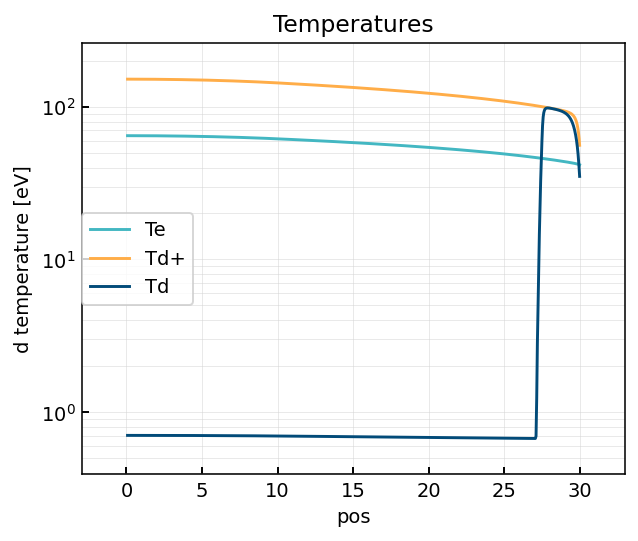

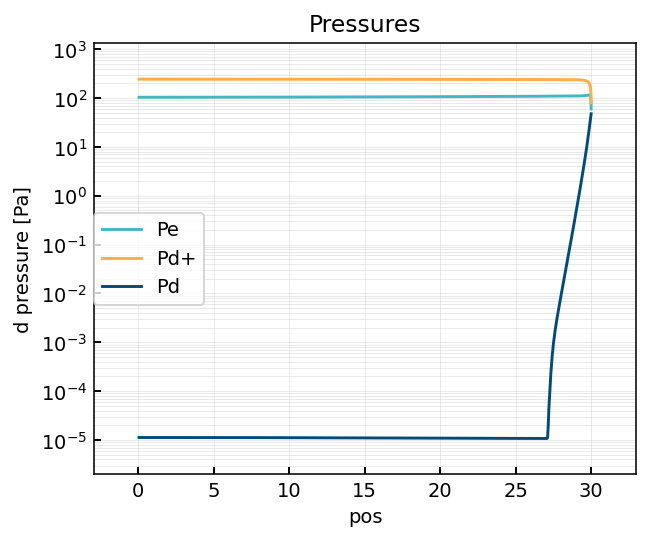

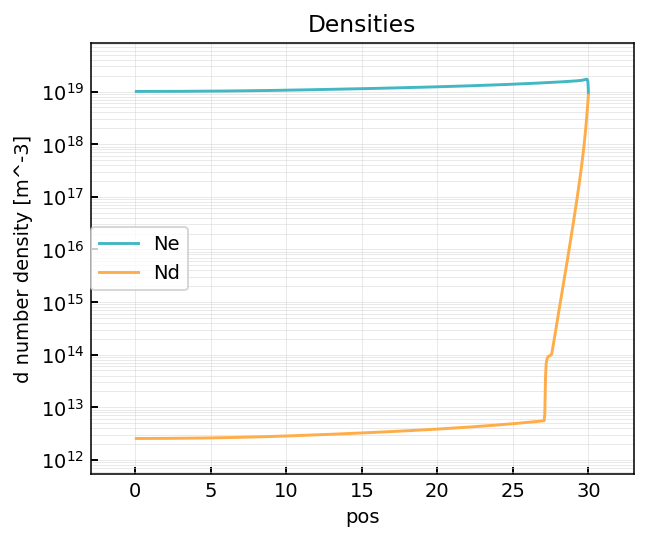

In [4]:
fig, ax = plt.subplots()
case = "base"
ds = cs[case].ds.isel(t=-1, pos = slice(2,-2))
ds["Te"].plot(ax = ax, label = "Te")
ds["Td+"].plot(ax = ax, label = "Td+")
ds["Td"].plot(ax = ax, label = "Td")
ax.set_yscale("log")
ax.legend()
ax.set_title("Temperatures")

fig, ax = plt.subplots()
case = "base"
ds = cs[case].ds.isel(t=-1, pos = slice(2,-2))
ds["Pe"].plot(ax = ax, label = "Pe")
ds["Pd+"].plot(ax = ax, label = "Pd+")
ds["Pd"].plot(ax = ax, label = "Pd")
ax.set_yscale("log")
ax.legend()
ax.set_title("Pressures")

fig, ax = plt.subplots()
case = "base"
ds = cs[case].ds.isel(t=-1, pos = slice(2,-2))
ds["Ne"].plot(ax = ax, label = "Ne")
ds["Nd"].plot(ax = ax, label = "Nd")
ax.set_yscale("log")
ax.legend()
ax.set_title("Densities")

## Comparison

In [11]:
cs.keys()

dict_keys(['testbase', 'testfix'])

In [ ]:
for case in cs:
    ds = cs[case].ds.isel(t=-1, pos = slice(2,-2))
    print(case)
    print(ds["Te"]

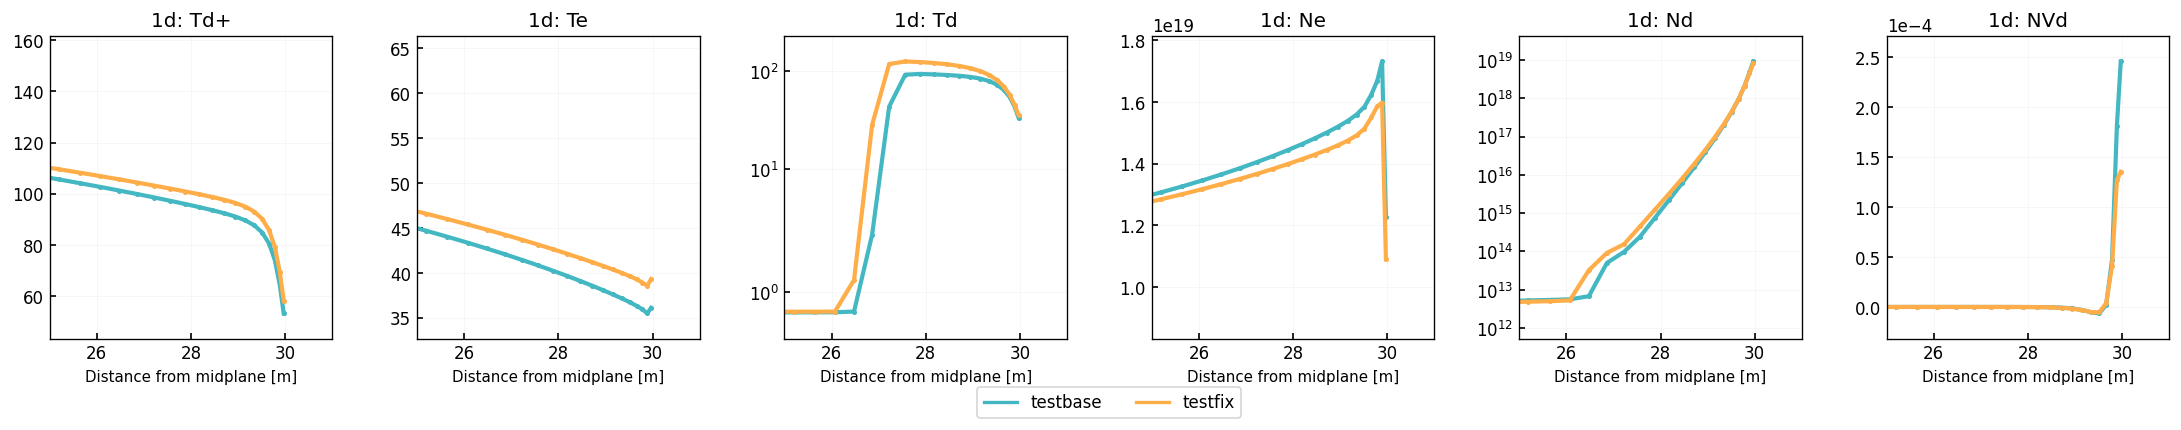

In [10]:
toplot = {}
for name in cs:
    ds = cs[name].ds
    if "t" in ds.dims:
        ds = ds.isel(t=-1)
    toplot[name] = ds

lineplot(
    toplot,
    clean_guards = True,
    params = ["Td+", "Te", "Td", "Ne", "Nd", "NVd"],
    regions = ["1d"],
    xlims=(25,31)
)